<a href="https://colab.research.google.com/github/salehaalbreik/asg2/blob/main/ASG3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Reading an Image**

The python libraries cv2 needed to be imported before reading an image.

In [ ]:
import cv2
!wget "https://cdn.pixabay.com/photo/2021/02/12/02/01/rosebud-6006985_1280.jpg"

--2025-09-11 08:34:20--  https://cdn.pixabay.com/photo/2021/02/12/02/01/rosebud-6006985_1280.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 172.64.147.160, 104.18.40.96, 2606:4700:4400::ac40:93a0, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|172.64.147.160|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 150462 (147K) [image/jpeg]
Saving to: ‘rosebud-6006985_1280.jpg.3’

rosebud-6006985_128 100%[===================>] 146.94K  --.-KB/s    in 0.01s   

2025-09-11 08:34:20 (12.0 MB/s) - ‘rosebud-6006985_1280.jpg.3’ saved [150462/150462]



In [ ]:
!pwd

/content


The function `cv2.imread()` is used to read an image. This function takes 2 arguments. The first argument is the image path. The image path can be just the name of the image if it is in the working directory else the full path needs to be specified.
The second argument is a flag that specifies the way the image should be read. There are 3 flag options:
1. `cv2.IMREAD_COLOR` : Loads a color image. Any transparency of image will be neglected. It is the default flag.
2. `cv2.IMREAD_GRAYSCALE` : Loads image in grayscale mode.
3. `cv2.IMREAD_UNCHANGED` : Loads image as such including alpha channel.

These flags can be used directly instead of using the integers 1, 0 and -1 respectively.

In [ ]:
img_color = cv2.imread('rosebud-6006985_1280.jpg',1)
img_grayscale = cv2.imread('rosebud-6006985_1280.jpg',0)
img_unchanged = cv2.imread('rosebud-6006985_1280.jpg',-1)

##Displaying an image
The function `cv2.imshow()` is used to display an image in a window. This function takes 2 arguments. The first argument is the window name (Specify unique window names to display multiple images) and the second argument is the image to be displayed.

`cv2.waitKey()` is a keyboard binding function. Its argument is the time in milliseconds. The function waits for specified milliseconds for any keyboard event. If you press any key in that time, the program continues. If 0 is passed, it waits indefinitely for a key stroke. It can also be set to detect specific keystrokes like the Q key or the ESC key on the keyboard.

`cv2.destroyAllWindows()` simply destroys all the windows we created. If you want to destroy any specific window, use the function `cv2.destroyWindow()` where you pass the exact window name as the argument.

All the OpenCV interactive functions won't work in any Jupyter/Colab notebook environment. So, we won't be able to use `cv2.imshow()` like the following here. We will Matplotlib instead.

In [ ]:
### The below won't work ###
"""
cv2.imshow('color image',img_color)
cv2.imshow('grayscale image',img_grayscale)
cv2.imshow('unchanged image',img_unchanged)
"""

"\ncv2.imshow('color image',img_color)\ncv2.imshow('grayscale image',img_grayscale)\ncv2.imshow('unchanged image',img_unchanged)\n"

The function `cv2.imshow()` opens a window displaying the image and therefore cannot be used in a Colab notebook. We can instead use Matplotlib to display image in the notebook. To use Matplotlib, we need to import the `matplotlib` library.

In [ ]:
from matplotlib import pyplot as plt

The function `plt.imshow()` is used to specify the image to be displayed and the function plt.show() is used to display it.

To hide the tick values on x and y axis, the function `plt.axis("off")` can be used.

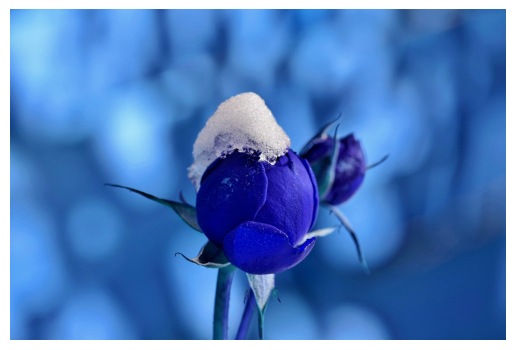

In [ ]:
plt.imshow(img_color)
plt.axis("off")
plt.show()

The displayed image isn't as expected. This happens because OpenCV represents RGB images as multi-dimensional NumPy array but in the reverse order. This means that images are actually represented in BGR order rather than RGB. This can be corrected by converting BGR to RGB.

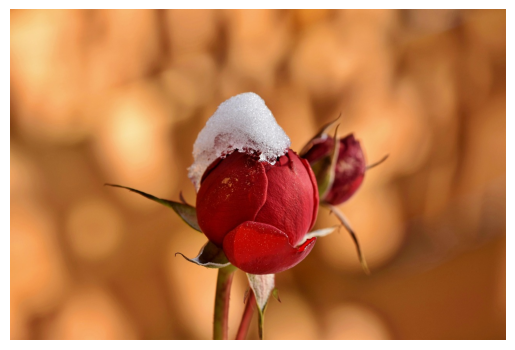

In [ ]:
img_color = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(img_color)
plt.show()

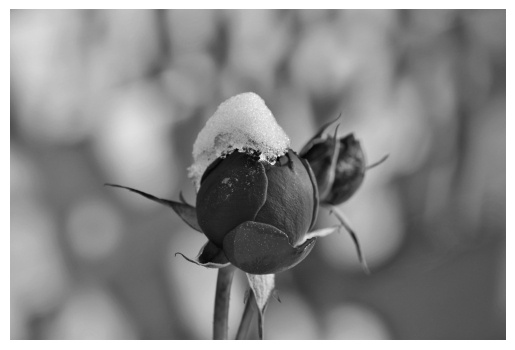

In [ ]:
plt.imshow(cv2.cvtColor(img_grayscale, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

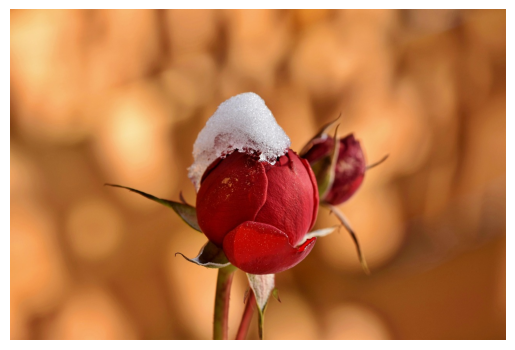

In [ ]:
plt.imshow(cv2.cvtColor(img_unchanged, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

##Writing an image
The function `cv2.imwrite()` is used to write an image.
It takes 2 arguments, first argument is the file name, second argument is the image you want to save. The below code will save the image in the working directory

In [ ]:
cv2.imwrite('img_color.png',img_color)
cv2.imwrite('grayscale.png',img_grayscale)

True

#High Contrast

In [ ]:
# Perform high contrast operation (multiply pixel values by 2)
# Ensure values don't exceed 255 (max for uint8)
high_contrast_image = cv2.convertScaleAbs(img_color, alpha=2.0, beta=0)

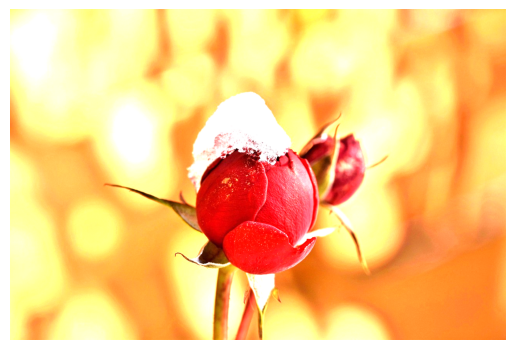

In [ ]:
plt.imshow(high_contrast_image)
plt.axis("off")
plt.show()

#Low Contrast

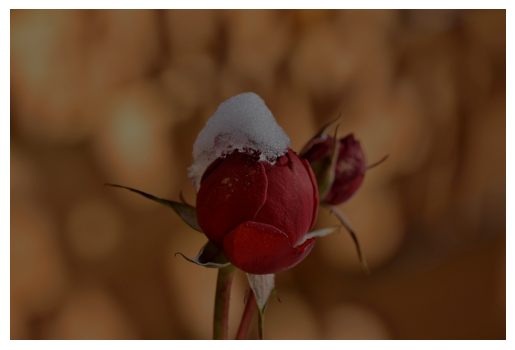

In [ ]:
plt.imshow(cv2.convertScaleAbs(img_color, alpha=0.5, beta=0))
plt.axis("off")
plt.show()

In [ ]:
import numpy as np
# Add Gaussian noise
mean = 0
std = 25  # Standard deviation for noise intensity
noise = np.zeros(img_grayscale.shape, np.uint8)
cv2.randn(noise, mean, std)
noisy_image = cv2.add(img_grayscale, noise)

# Clip values to ensure they stay within [0, 255]
noisy_image = np.clip(noisy_image, 0, 255)

# Save or display the result
cv2.imwrite('noisy_img.jpg', noisy_image)

True

#Nested loops for pixel-wise operations

In [ ]:

# Use a nested for loop to add the value to each pixel

# Define the value to add to each pixel
add_value = 40  # Adjust this value as needed

# Create a copy of the image to store the result
modified_image = img_grayscale.copy()

# Get image dimensions
height, width = img_grayscale.shape

operations = 0

# Use a nested for loop to add the value to each pixel
for i in range(height):
    for j in range(width):
        new_value = img_grayscale[i, j] + add_value #unit8 - takes between 0-255
        print('original value=', img_grayscale[i, j], 'new_value=', new_value)
        # Clip the value to stay within [0, 255]
        modified_image[i, j] = max(0, min(255, new_value))
        operations += 1
print("Number of operations =", operations)
# Save or display the result
cv2.imwrite('modified_image.jpg', modified_image)
#cv2.imshow('Modified Image', modified_image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

Streaming output truncated to the last 5000 lines.
original value= 111 new_value= 151
original value= 110 new_value= 150
original value= 110 new_value= 150
original value= 110 new_value= 150
original value= 111 new_value= 151
original value= 111 new_value= 151
original value= 111 new_value= 151
original value= 111 new_value= 151
original value= 111 new_value= 151
original value= 111 new_value= 151
original value= 111 new_value= 151
original value= 112 new_value= 152
original value= 112 new_value= 152
original value= 113 new_value= 153
original value= 112 new_value= 152
original value= 113 new_value= 153
original value= 115 new_value= 155
original value= 117 new_value= 157
original value= 117 new_value= 157
original value= 115 new_value= 155
original value= 116 new_value= 156
original value= 117 new_value= 157
original value= 119 new_value= 159
original value= 117 new_value= 157
original value= 118 new_value= 158
original value= 122 new_value= 162
original value= 121 new_value= 161
orig

/tmp/ipython-input-1525010015.py:17: RuntimeWarning: overflow encountered in scalar add
  new_value = img_grayscale[i, j] + add_value #unit8 - takes between 0-255


Streaming output truncated to the last 5000 lines.
original value= 149 new_value= 189
original value= 150 new_value= 190
original value= 150 new_value= 190
original value= 152 new_value= 192
original value= 152 new_value= 192
original value= 151 new_value= 191
original value= 153 new_value= 193
original value= 152 new_value= 192
original value= 153 new_value= 193
original value= 155 new_value= 195
original value= 155 new_value= 195
original value= 156 new_value= 196
original value= 156 new_value= 196
original value= 157 new_value= 197
original value= 157 new_value= 197
original value= 159 new_value= 199
original value= 159 new_value= 199
original value= 160 new_value= 200
original value= 162 new_value= 202
original value= 163 new_value= 203
original value= 163 new_value= 203
original value= 164 new_value= 204
original value= 166 new_value= 206
original value= 165 new_value= 205
original value= 166 new_value= 206
original value= 167 new_value= 207
original value= 168 new_value= 208
orig

True

#Sharpening

In [ ]:
import numpy as np
from PIL import Image

In [1]:
def get_sharpening_kernel(kernel_size):
    """
    Generates a sharpening kernel for the specified size (3x3, 5x5, or 7x7).

    Args:
        kernel_size (int): Size of the kernel (3, 5, or 7).

    Returns:
        np.array: Sharpening kernel.
    """
    if kernel_size == 3:
        return np.array([
            [0, -1, 0],
            [-1, 5, -1],
            [0, -1, 0]
        ], dtype=np.float32)
    elif kernel_size == 5:
        return np.array([
            [0,  0, -1,  0,  0],
            [0, -1, -2, -1,  0],
            [-1,-2, 16, -2, -1],
            [0, -1, -2, -1,  0],
            [0,  0, -1,  0,  0]
        ], dtype=np.float32) / 4  # Normalize to reduce intensity
    elif kernel_size == 7:
        return np.array([
            [0, 0, 0, -1, 0, 0, 0],
            [0, 0, -1, -2, -1, 0, 0],
            [0, -1, -2, -3, -2, -1, 0],
            [-1, -2, -3, 25, -3, -2, -1],
            [0, -1, -2, -3, -2, -1, 0],
            [0, 0, -1, -2, -1, 0, 0],
            [0, 0, 0, -1, 0, 0, 0]
        ], dtype=np.float32) / 8  # Normalize to reduce intensity
    else:
        raise ValueError("Unsupported kernel size. Use 3, 5, or 7.")

In [ ]:
def get_scaling_kernel(kernel_size, scale_factor=1.2):
    """
    Generates a scaling kernel for the specified size (3x3, 5x5, or 7x7).

    Args:
        kernel_size (int): Size of the kernel (3, 5, or 7).
        scale_factor (float): Scaling factor for pixel intensities (e.g., 1.2 for 20% brighter).

    Returns:
        np.array: Scaling kernel with a central weight equal to scale_factor and zeros elsewhere.
    """
    if kernel_size not in [3, 5, 7]:
        raise ValueError("Unsupported kernel size. Use 3, 5, or 7.")

    # Create a kernel with zeros and scale_factor at the center
    kernel = np.zeros((kernel_size, kernel_size), dtype=np.float32)
    center = kernel_size // 2
    kernel[center, center] = scale_factor
    return kernel

In [ ]:
def get_blurring_kernel(kernel_size):
    """
    Generates a mean (box) blur kernel for the specified size (3x3, 5x5, or 7x7).

    Args:
        kernel_size (int): Size of the kernel (3, 5, or 7).

    Returns:
        np.array: Normalized mean blur kernel.
    """
    if kernel_size not in [3, 5, 7]:
        raise ValueError("Unsupported kernel size. Use 3, 5, or 7.")

    # Create a kernel with equal weights (mean blur)
    kernel = np.ones((kernel_size, kernel_size), dtype=np.float32)
    # Normalize by dividing by total number of elements
    kernel /= (kernel_size * kernel_size)
    return kernel

In [ ]:
def convolve_image(input_path, output_path, kernel_size=3, kernel_type = 'scale'):
    """
    Applies convolution to an image using a sharpening kernel of specified size with nested loops.

    Args:
        input_path (str): Path to the input image file.
        output_path (str): Path to save the convolved image.
        kernel_size (int): Size of the kernel (3, 5, or 7).
    """
    try:
        # Load image and convert to grayscale (single channel for simplicity)
        image = Image.open(input_path).convert('L')
        img_array = np.array(image, dtype=np.float32)
        height, width = img_array.shape

        if kernel_type == "sharp":
            kernel = get_sharpening_kernel(kernel_size)
        if kernel_type == "blur":
            kernel = get_blurring_kernel(kernel_size)
        if kernel_type == "scale":
            kernel = get_scaling_kernel(kernel_size = 3, scale_factor=2)

        offset = kernel_size // 2  # For padding and region extraction

        # Pad the image to handle edges
        padded_array = np.pad(img_array, pad_width=offset, mode='edge')
        output_array = np.zeros_like(img_array)

        ops = 0
        # Perform convolution with nested loops
        for i in range(height):
            for j in range(width):
                # Extract region matching kernel size
                region = padded_array[i:i+kernel_size, j:j+kernel_size]
                # Apply convolution: multiply region with kernel and sum
                pixel_value = np.sum(region * kernel)
                # Clip to valid pixel range (0-255)
                output_array[i, j] = np.clip(pixel_value, 0, 255)

        ops += kernel_size * kernel_size # multiplications for one pixel
        ops += kernel_size * kernel_size - 1 # additions for one pixel
        ops *= height * width # for all pixels

        print("Number of operations =", ops)

        # Convert output array to image and save
        convolved_image = Image.fromarray(output_array.astype(np.uint8))
        convolved_image.save(output_path)
        print(f"Convolved image with a kernel {kernel_type} saved to {output_path}", "\n")

    except Exception as e:
        print(f"Error processing image: {e}")

    return output_array

In [ ]:
# Example usage
if __name__ == "__main__":
    input_image = "img_color.png"  # Replace with your input image path
    output_base = "convolved_output_{}x{}.jpg"

    # Apply convolution with different kernel sizes
    for k_size in [3, 5, 7]:
        output_image = output_base.format(k_size, k_size)
       # convolve_image(input_image, output_image, kernel_size=k_size, kernel_type= 'sharp')
        convolve_image(input_image, output_image, kernel_size=k_size, kernel_type= 'blur')
        convolve_image(input_image, output_image, kernel_size=k_size, kernel_type= 'scale')

Number of operations = 18561280
Convolved image with a kernel blur saved to convolved_output_3x3.jpg 

Number of operations = 18561280
Convolved image with a kernel scale saved to convolved_output_3x3.jpg 

Number of operations = 53500160
Convolved image with a kernel blur saved to convolved_output_5x5.jpg 

Error processing image: operands could not be broadcast together with shapes (5,5) (3,3) 
Number of operations = 105908480
Convolved image with a kernel blur saved to convolved_output_7x7.jpg 

Error processing image: operands could not be broadcast together with shapes (7,7) (3,3) 


In [ ]:
k_size = 3
input_image = "img_color.png" # will be turned into grayscale
output_image = output_base.format(k_size, k_size)
img_blurred = convolve_image(input_image, output_image, kernel_size=3, kernel_type= 'blur')
img_scaled = convolve_image(input_image, output_image, kernel_size=3, kernel_type= 'scale')
img_sharpened = convolve_image(input_image, output_image, kernel_size=3, kernel_type= 'sharp')
print(img_scaled)

Number of operations = 18561280
Convolved image with a kernel blur saved to convolved_output_3x3.jpg 

Number of operations = 18561280
Convolved image with a kernel scale saved to convolved_output_3x3.jpg 

Number of operations = 18561280
Convolved image with a kernel sharp saved to convolved_output_3x3.jpg 

[[255. 254. 255. ... 190. 194. 198.]
 [255. 254. 255. ... 188. 192. 196.]
 [255. 255. 255. ... 188. 190. 192.]
 ...
 [255. 255. 255. ... 110. 110. 114.]
 [255. 255. 255. ... 110. 110. 114.]
 [255. 255. 255. ... 112. 110. 112.]]


In [ ]:
modified_image = Image.fromarray(img_sharpened.astype(np.uint8))
modified_image.save('img_sharpened.png')

In [ ]:

output_array = np.subtract(img_scaled, 0.5*img_blurred)
modified_image = Image.fromarray(output_array.astype(np.uint8))
modified_image.save('img_sharpened1.png')
